# Coursework part one

## Financial Time Series

### Data Import via yfinance

Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.

In [209]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [210]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

Download the data and save it as a pandas DataFrame.

In [211]:
initial_data = yf.download("TWTR", start="2020-03-01", end="2021-03-02")

[*********************100%***********************]  1 of 1 completed


In [212]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,36.000000,36.860001,35.139999,35.820000,35.820000,39914700
2020-03-03,36.020000,36.480000,34.410000,34.930000,34.930000,22973100
2020-03-04,35.759998,36.000000,34.770000,36.000000,36.000000,14980300
2020-03-05,35.029999,35.730000,34.520000,34.970001,34.970001,14132200
2020-03-06,33.810001,33.990002,32.509998,33.459999,33.459999,20361100


In [213]:
initial_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-23,68.449997,74.330002,66.190002,73.169998,73.169998,32669500
2021-02-24,73.099998,73.949997,71.709999,71.919998,71.919998,18309900
2021-02-25,78.150002,80.750000,73.889999,74.589996,74.589996,63625700
2021-02-26,76.870003,79.080002,75.000000,77.059998,77.059998,35307600
2021-03-01,78.360001,78.730003,76.050003,77.629997,77.629997,24277600


In [214]:
initial_data['Adj Close'].head()

Date
2020-03-02    35.820000
2020-03-03    34.930000
2020-03-04    36.000000
2020-03-05    34.970001
2020-03-06    33.459999
Name: Adj Close, dtype: float64

Set the Adj Closed data as a new DataFrame we will use.

In [215]:
data1 =  initial_data['Adj Close'] 
data = pd.DataFrame(data1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-02 to 2021-03-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [216]:
data.tail()

,Adj Close
Date,
2021-02-23,73.169998
2021-02-24,71.919998
2021-02-25,74.589996
2021-02-26,77.059998
2021-03-01,77.629997


array([<AxesSubplot:xlabel='Date'>], dtype=object)

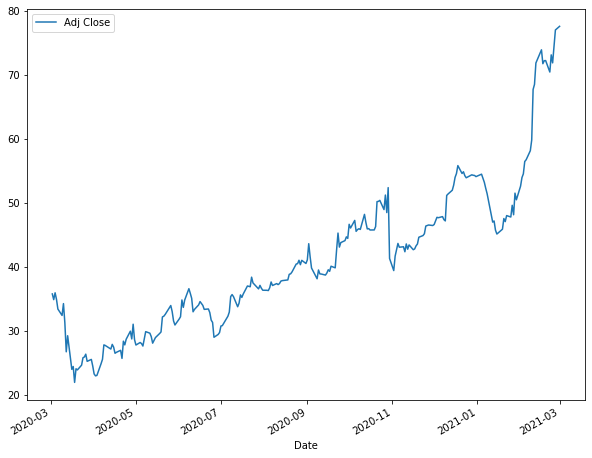

In [217]:
data.plot(figsize=(10, 8), subplots=True)

### Changes over Time

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.

First, the absolute differences, for which pandas provides a special method:

In [218]:
data.diff().head().round(2)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.89
2020-03-04,1.07
2020-03-05,-1.03
2020-03-06,-1.51


In [219]:
data.diff().tail().round(2)

,Adj Close
Date,
2021-02-23,2.68
2021-02-24,-1.25
2021-02-25,2.67
2021-02-26,2.47
2021-03-01,0.57


In [220]:
data.diff().describe().round(2)

,Adj Close
count,251.00
mean,0.17
std,1.58
min,-11.07
25%,-0.58
50%,0.16
75%,0.80
max,7.90


From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns (also: simple returns) in a financial context and visualizes their mean values per column:

In [221]:
data.pct_change().round(4).head()

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0248
2020-03-04,0.0306
2020-03-05,-0.0286
2020-03-06,-0.0432


As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context.

In [222]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,Adj Close
Date,
2020-03-02,NaN
2020-03-03,-0.0252
2020-03-04,0.0302
2020-03-05,-0.0290
2020-03-06,-0.0441


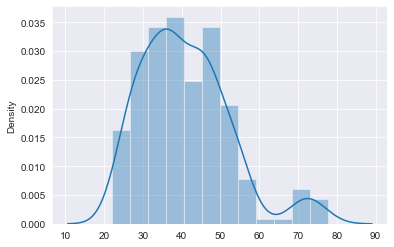

In [283]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(data)
import warnings
warnings.filterwarnings('ignore')

(0.0, 50.0)

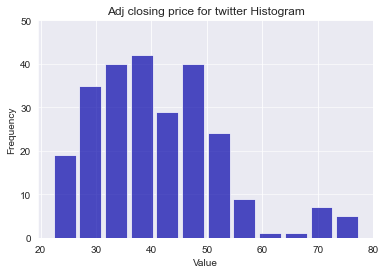

In [224]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85,)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Adj closing price for twitter Histogram')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


### Resampling

Resampling is an important operation on financial time series data. Usually this takes the form of downsampling, meaning that, for example, a tick data series is resampled to one-minute intervals or a time series with daily observations is resampled to one with weekly or monthly observations

In [225]:
data.resample('1w', label='right').last().head()

,Adj Close
Date,
2020-03-08,33.459999
2020-03-15,29.290001
2020-03-22,23.950001
2020-03-29,25.290001
2020-04-05,23.090000


In [226]:
data.resample('1m', label='right').last().head()

,Adj Close
Date,
2020-03-31,24.559999
2020-04-30,28.680000
2020-05-31,30.969999
2020-06-30,29.790001
2020-07-31,36.400002


<AxesSubplot:xlabel='Date'>

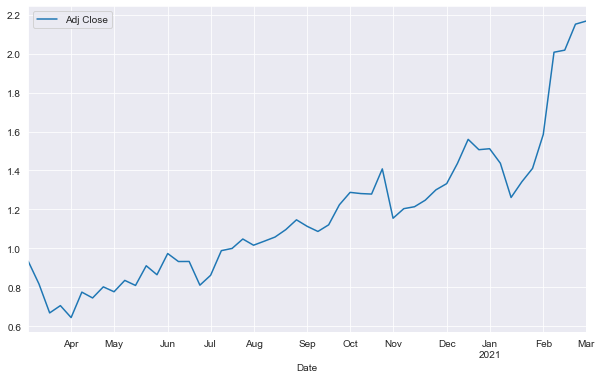

In [227]:
rets.cumsum().apply(np.exp). resample('1w', label='right').last().plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

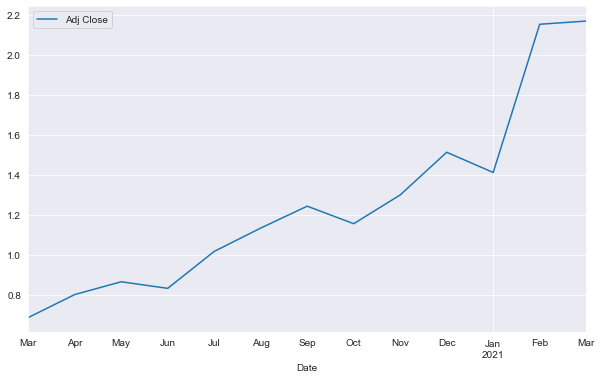

In [228]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last().plot(figsize=(10, 6))

### The normal daily returns and log-returns. Then the annualized return and volatility of Twitter (TWYR)

In [229]:
data.describe().round(2)

,Adj Close
count,252.00
mean,40.90
std,11.50
min,22.00
25%,32.43
50%,39.17
75%,47.22
max,77.63


In [230]:
data.head()

,Adj Close
Date,
2020-03-02,35.820000
2020-03-03,34.930000
2020-03-04,36.000000
2020-03-05,34.970001
2020-03-06,33.459999


In [231]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.02484643766697288,
 0.03063268495493459,
 -0.028611077202690974,
 -0.04317992803890751,
 -0.029886432377819665]

In [232]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.02516032055734001,
 0.030172870900587793,
 -0.029028352473673566,
 -0.04413991778560414,
 -0.03034213431517314]

In [233]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annulized normal return is 0.97061639 and its annulized volatility is 0.61893803


In [234]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f' % (lr,lv))

The annulized log return is 0.77344753 and its annulized volatility is 0.63171734


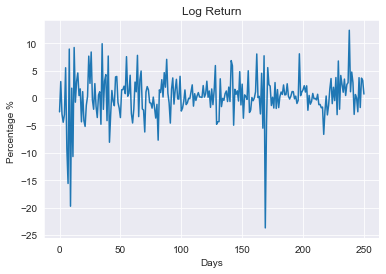

In [235]:
fig = plt.figure()
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

### The semi annually (last 6 months) return and volatility of Twitter

In [236]:
normal_return_last_6months=normal_return [125:]

In [237]:
len(dfnr)

251

In [238]:
normal_return_last_6months[:5]

[0.016835858268174637,
 -0.011930797842963765,
 0.01404632008636369,
 0.061239284316468384,
 -0.04671392686892221]

In [239]:
log_return_last_6months=log_return [125:]

In [240]:
log_return_last_6months [:5]

[0.016695706073972943,
 -0.012002541018077469,
 0.013948584684210502,
 0.05943736136414435,
 -0.04784023870389146]

In [241]:
dfnr1 = pd.DataFrame(normal_return_last_6months, columns = ['normal']) 
nr1 = dfnr1.mean() * len(dfnr)
nv1 = dfnr1.std() * (len(dfnr) ** 0.5)
print('The annualized normal return (for the last 6 months) is %.8f and its annualized volatility (for the last 6 months)is %.8f' % (nr1,nv1))

The annulized normal return (for the last 6 months) is 1.46987082 and its annulized volatility (for the last 6 months)is 0.56762430


In [242]:
dflr1 = pd.DataFrame(log_return_last_6months, columns = ['log']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The semi annualized log return (for the last 6 months) is %.8f and its annualized volatility (for the last 6 months) is %.8f' % (lr1,lv1))

The semi annulized log return (for the last 6 months) is 1.30155791 and its annulized volatility (for the last 6 months) is 0.58124604


### The average for the log volatility (for the last one year and 6 months )

In [243]:
all_lv=lv,lv1
all_lv1 = pd.DataFrame (all_lv)

In [244]:
all_lv1['Time'] = ('last year', 'last 6 months')
all_lv1

,log,Time
0,0.631717,last year
1,0.581246,last 6 months


In [245]:
lvv=all_lv1 ['log'].mean()
print ('The combine Log volatility =', lvv)

The combine Log volatility = 0.6064816874048876


# Corsework part two

## Binomial Tree (CRR Tree)

The Binomial options pricing model approach has been widely used since it is able to handle a variety of conditions for which other models cannot easily be applied. This is largely because the BOPM is based on the description of an underlying instrument over a period of time rather than a single point.

In [321]:
import numpy as np
import os

### Data Input

Valuation is performed iteratively, starting at each of the final nodes (those that may be reached at the time of expiration), and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

In [601]:
S0 = 77.63                # spot stock price  
K = 75.0                  # strike 70.0
T = 4/52                  # maturity 
r = 0.0145                # risk free rate  1,Mar     
Cash= 1                   # the payoff if the stock price in maturity less than K (S<K)
sig = 0.6064816874048876  # collaborate (Average) volatility of the last one year and 6 months
N = 10                    # number of periods or number of time steps  
payoff = "put"            # the option type 

### Step 1: Create the binomial price tree

The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = S * u or S_down = S * d.

In [602]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [603]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [604]:
S

array([[ 77.63      ,  81.87108804,  86.34387553,  91.06102068,
         96.03587326, 101.28251236, 106.81578625, 112.65135438,
        118.8057317 , 125.29633544, 132.14153433],
       [  0.        ,  73.6086089 ,  77.63      ,  81.87108804,
         86.34387553,  91.06102068,  96.03587326, 101.28251236,
        106.81578625, 112.65135438, 118.8057317 ],
       [  0.        ,   0.        ,  69.795534  ,  73.6086089 ,
         77.63      ,  81.87108804,  86.34387553,  91.06102068,
         96.03587326, 101.28251236, 106.81578625],
       [  0.        ,   0.        ,   0.        ,  66.1799841 ,
         69.795534  ,  73.6086089 ,  77.63      ,  81.87108804,
         86.34387553,  91.06102068,  96.03587326],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         62.75172699,  66.1799841 ,  69.795534  ,  73.6086089 ,
         77.63      ,  81.87108804,  86.34387553],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  59.50106054,  62.7

In [605]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48775316025763843

### Step 2: Find option value at each final node

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value: If[(S_n>=K),Cash,0] for a call option and If[(K>S_n),Cash,0] for a put option, where K is the strike price, S_n is the spot price of the underlying asset at the n-th period and the cash is the payoff.

In [606]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.where (S_T>=K,Cash, 0.0)  
elif payoff =="put":
    V[:,-1] = np.where (K>S_T,Cash,0.0)  
V

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Step 3: Find option value at earlier nodes

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

#### Cash-or-Nothing Binary Option

In [607]:
# For  Binary put Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[0.4069822 , 0.27831808, 0.16105493, 0.07088337, 0.01805448,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.52958273, 0.39003476, 0.24694991, 0.12120161,
        0.0352496 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66257336, 0.52636277, 0.36673918,
        0.20307012, 0.06882138, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.79241517, 0.67846838,
        0.52266208, 0.33094381, 0.13436698, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.90108602,
        0.82697237, 0.70532692, 0.51819316, 0.2623383 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.97185205, 0.94298128, 0.88366625, 0.76192687, 0.51218971,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [608]:
print('Cash-or-Nothing Binary put (TWTR)' + payoff, str( V[0,0]))

Cash-or-Nothing Binary put (TWTR)put 0.40698220298392923


## Monte Carlo Simulation

It still has one Python loop, namely over the time intervals. The other dimension is handled by vectorized code over all paths.

In [609]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [610]:
T = 4/52                    # maturity 
r = 0.0145                  # risk free rate  1,Mar
sigma = 0.6064816874048876  # collaborate (Average) volatility of the last one year and 6 months
Cash= 1                     # the payoff if the stock price in maturity less than K (S<K)
S0 = 77.63                  # spot stock price
K = 75.0                    # strike

In [611]:
S = mcs_simulation_np(3500)

In [612]:
S = np.transpose(S)
S

array([[ 77.63      ,  77.93312941,  77.78321732, ...,  86.95496817,
         87.10102883,  86.8772137 ],
       [ 77.63      ,  77.673968  ,  77.35527171, ...,  81.43209136,
         81.25366984,  81.4584664 ],
       [ 77.63      ,  77.48278547,  77.47424282, ...,  78.15270058,
         78.13662226,  78.15931335],
       ...,
       [ 77.63      ,  78.08288128,  77.9622191 , ...,  66.58171928,
         66.76100861,  66.45713764],
       [ 77.63      ,  77.68388768,  77.56738765, ...,  78.14817803,
         77.92231817,  77.55486496],
       [ 77.63      ,  77.38561171,  77.19041564, ...,  99.88266932,
        100.15039855,  99.78545516]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

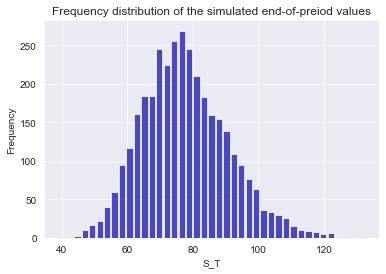

In [613]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [614]:
p = np.mean(np.where(K > S[:,-1],Cash,0))     
print('Cash-or-Nothing Binary put (TWTR)', str(p))

Cash-or-Nothing Binary put (TWTR) 0.44657142857142856


In [615]:
print('Cash-or-Nothing Binary put price (TWTR) by binomial price tree method ' , str( V[0,0]))
print('Cash-or-Nothing Binary put price (TWTR) by Monte Carlo Simulation method', str(p))

Cash-or-Nothing Binary put price (TWTR) by binomial price tree method  0.40698220298392923
Cash-or-Nothing Binary put price (TWTR) by Monte Carlo Simulation method 0.44657142857142856


### The average Cash-or-Nothing Binary put price (TWTR)

In [616]:
Put_prices=( 0.40698220298392923,0.44657142857142856)
Put_price1 = pd.DataFrame (Put_prices)

In [617]:
Put_price1['Method'] = ('binomial price tree ', 'Monte Carlo Simulation method')
#del Put_price1 [0:0]
#Put_price1.at [0,0]= 2
Put_price1.columns = ['Price','Method' ]
Put_price1

,Price,Method
0,0.406982,binomial price tree
1,0.446571,Monte Carlo Simulation method


In [618]:
Put_price1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2 non-null      float64
 1   Method  2 non-null      object 
dtypes: float64(1), object(1)
memory usage: 160.0+ bytes


In [619]:
Price_mean=Put_price1 ['Price'].mean()
print ('The combine Binary put price (TWTR)=', Price_mean)

The combine Binary put price (TWTR)= 0.4267768157776789


# Part 3

## Greeks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

### Delta For Binary Put

In [4]:
def delta(S, K, T, r, vol):
    
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    delta = -(np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0))/ (vol * S * np.sqrt(T))
    
    return delta

In [5]:
delta(77.63, 75,4/52,0.0145, 0.6064816874048876)

-0.030270812005605167

In [6]:
S = np.linspace(40,110,20)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 75, 4/52, 0.0145, 0.6064816874048876)

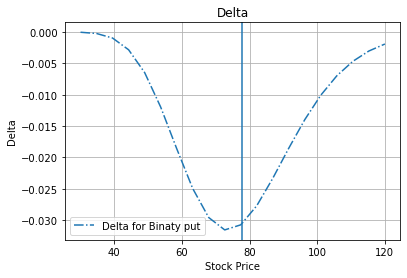

In [24]:
fig = plt.figure()
plt.plot(S, Delta_Put, '-.')
plt.xlabel('Stock Price')
plt.axvline(77.63)
plt.grid()
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Binaty put'])

### Gamma For Binary Put

In [8]:
def gamma(S, K, T, r, vol):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = (np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0)) / ((vol ** 2) * (S ** 2) * T)
    
    return gamma

In [9]:
gamma(77.63, 75,4/52,0.0145, 0.6064816874048876)

0.0006853378551044276

In [10]:
S = np.linspace(30,120,20)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 75, 4/52, 0.0145, 0.6064816874048876)

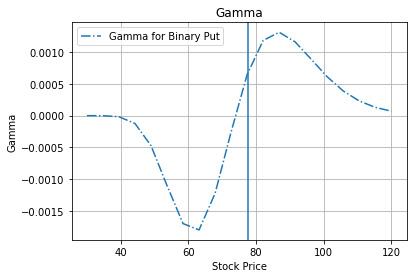

In [25]:
fig = plt.figure()
plt.plot(S, Gamma, '-.')
plt.xlabel('Stock Price')
plt.axvline(77.63)
plt.ylabel('Gamma')
plt.grid()
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

### Speed For Binary Put

In [12]:
def speed(S,E,T,r,vol):
    d1= (np.log(S/E)+(r+0.5*vol**2)*T)/(vol*np.sqrt(T))
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    speed_put= (np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)/(vol**2*S**3*T))*(-2*d1+(1-(d1*d2))/(vol*np.sqrt(T)))
    return speed_put

In [13]:
speed(77.63, 75,4/52,0.0145, 0.6064816874048876)

0.00015318599486105288

In [14]:
S = np.linspace(30,120,20)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 75, 4/52, 0.0145, 0.6064816874048876)

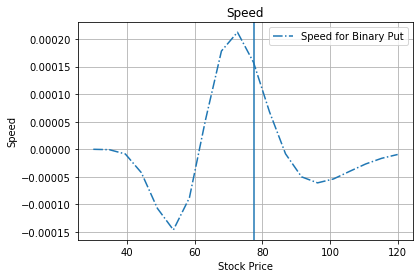

In [26]:
fig = plt.figure()
plt.plot(S, Speed, '-.')
plt.xlabel('Stock Price')
plt.axvline(77.63)
plt.ylabel('Speed')
plt.grid()
plt.title('Speed')
plt.legend(['Speed for Binary Put'])

### Theta For Binary Put

In [16]:
def theta(S, E, T, r, vol):
    d1 = (np.log(S / E) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / E) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    theta_put =(r*np.exp(-r*T)*(1-si.norm.cdf(d2,0.0,1.0))-np.exp(-r*T)*si.norm.pdf(d2,0.0,1.0)*((d1/2*T)-(r/(vol*np.sqrt(T)))))
    return theta_put

In [17]:
theta (77.63, 75,4/52,0.0145, 0.6064816874048876)

0.03608697536997154

In [38]:
T = np.linspace(0.15,0.01,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(77.63 ,75, T [i], 0.0145, 0.6064816874048876)

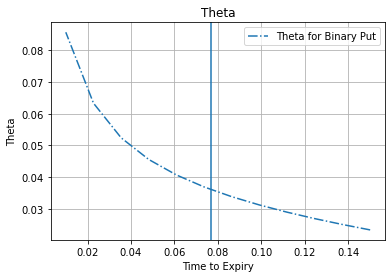

In [39]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-.')
plt.xlabel('Time to Expiry')
plt.axvline(4/52)
plt.ylabel('Theta')
plt.grid()
plt.title('Theta')
plt.legend(['Theta for Binary Put'])

### Rho For Binary Put

In [20]:
def rho(S,E,T,r,vol):
    d2= (np.log(S/E)+(r-0.5*vol**2)*T)/(vol*np.sqrt(T))
    rho = - T * np.exp(-r * T) * (1-si.norm.cdf(d2,0.0,1.0)) -(si.norm.cdf(- np.sqrt(T)/ vol)* np.exp(-r * T) * (1-si.norm.pdf(d2,0.0,1.0)))   
    return rho

In [21]:
rho (77.63, 75,4/52,0.0145, 0.6064816874048876)

-0.22992620178527698

In [22]:
r = np.linspace(0,.04,20)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(77.63, 75,4/52, r[i], 0.6064816874048876)

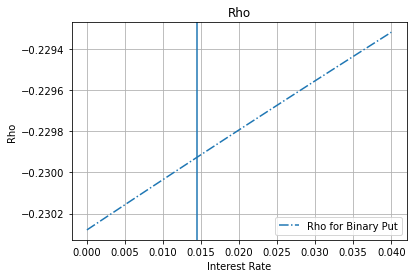

In [29]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-.')
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.grid()
plt.axvline(0.0145)
plt.title('Rho')
plt.legend(['Rho for Binary Put'])